Метрики классификации:

KNN:
  Accuracy: 0.967
  Precision: 0.929
  Recall: 1.000

Decision Tree:
  Accuracy: 0.967
  Precision: 1.000
  Recall: 0.923

Logistic Regression:
  Accuracy: 0.967
  Precision: 0.929
  Recall: 1.000

Визуализация результатов:


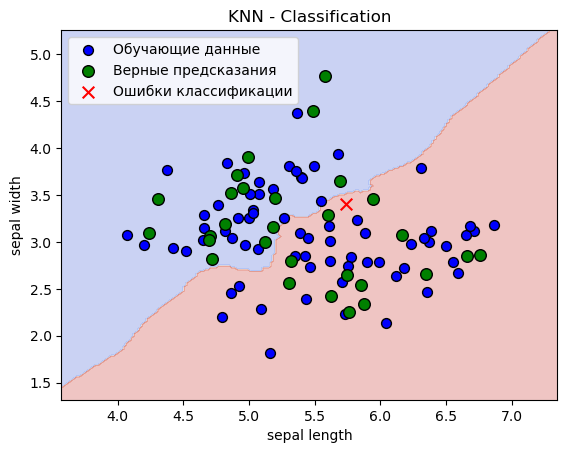

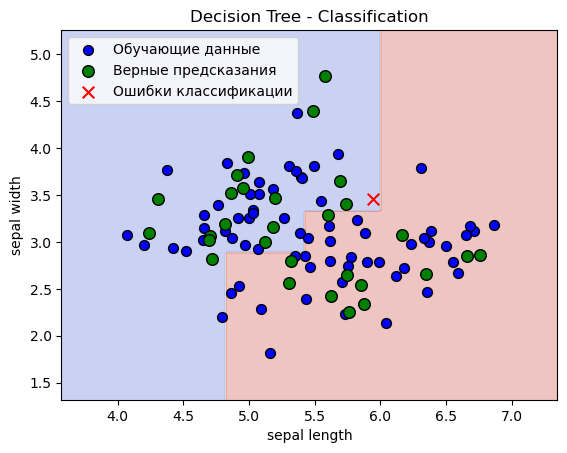

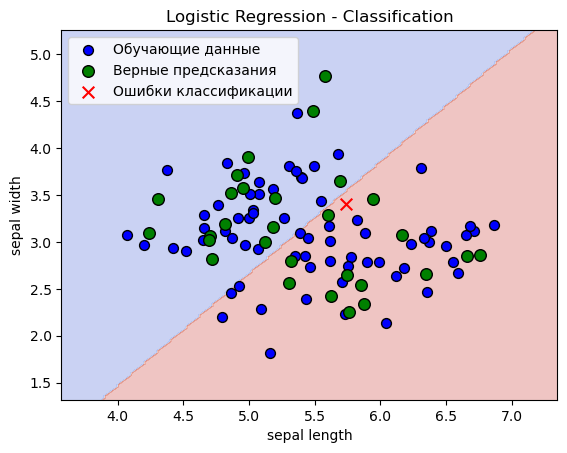

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

np.random.seed(42)
noise = np.random.normal(0, 0.2, size=X.shape)
X = X + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)}

for name, model in models.items():
    model.fit(X_train, y_train)

metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=1),
        "recall": recall_score(y_test, y_pred)}

print("Метрики классификации:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metric['accuracy']:.3f}")
    print(f"  Precision: {metric['precision']:.3f}")
    print(f"  Recall: {metric['recall']:.3f}")

def plot_decision_boundary(model, X, y, title):

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    
    plt.scatter(X_train[:, 0], X_train[:, 1], 
                c='blue', marker='o', edgecolor='k', 
                label='Обучающие данные', s=50)
    
    y_pred = model.predict(X_test)
    correct = y_pred == y_test
    
    plt.scatter(X_test[correct, 0], X_test[correct, 1],
                c='green', marker='o', edgecolor='k',
                label='Верные предсказания', s=70)
    
    plt.scatter(X_test[~correct, 0], X_test[~correct, 1],
                c='red', marker='x', 
                label='Ошибки классификации', s=70)
    
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title(title)
    plt.legend()
    plt.show()

print("\nВизуализация результатов:")
for name, model in models.items():
    plot_decision_boundary(model, X, y, f"{name} - Classification")